## All imports

In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from textblob import TextBlob
import re
from collections import Counter
from nltk.stem import PorterStemmer
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from itertools import chain
%matplotlib inline
#import spacy
#from google_ngram_downloader import readline_google_store

In [2]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download()

### Import csv file and rename cols

In [3]:
nyt = pd.read_csv("nyt_articles_us.csv", names = ['title', 'ptag', 'author', 'date'], skiprows = 1)

In [4]:
nyt.head(10)

,title,ptag,author,date
0,HUD Moves to Limit Public Housing Aid for Undo...,The rule would require expanded use of a verif...,ANNIE KARNI and MICHAEL D. SHEAR,17-Apr-19
1,A Barnes Foundation Show Illuminates the Dawn ...,An exhibition shows how the pioneers of photog...,ARTHUR LUBOW,17-Apr-19
2,Trump Administration Announces New Restriction...,Some whose property had been seized by the Cas...,NIRAJ CHOKSHI and FRANCES ROBLES,17-Apr-19
3,Terry McAuliffe Will Not Run for President,The former Virginia governor concluded that hi...,JONATHAN MARTIN,17-Apr-19
4,San Francisco’s Big-Hatted ‘Beach Blanket Baby...,This treasured San Francisco staple is renowne...,MICHAEL PAULSON,17-Apr-19
5,2020 Democrats Seek Voters in an Unusual Spot:...,A network known for conservative commentary an...,MICHAEL M. GRYNBAUM and SYDNEY EMBER,17-Apr-19
6,He Listed a T. Rex Fossil on eBay for $2.95 Mi...,"“I own this thing,” Alan Detrich recalled tell...",LAURA M. HOLSON,17-Apr-19
7,"Mueller Report, Columbine, Beyoncé: Your Wedne...",Here’s what you need to know at the end of the...,REMY TUMIN and MARCUS PAYADUE,17-Apr-19
8,E.P.A. Moves to ‘Close the Door’ on Asbestos. ...,"The new rule will restrict uses of asbestos, a...",LISA FRIEDMAN,17-Apr-19
9,"Dr. Richard Green, 82, Dies; Challenged Psychi...",At a time when being gay was classified as a m...,BENEDICT CAREY,17-Apr-19


## Reprocessing 

In [5]:
#remove punctuation -- it doesn’t add any extra information while treating text data. 
#Removing all instances of it will help us reduce the size of the training data.
nyt['title'] = nyt['title'].apply(lambda x: re.sub('[^\w\s]', '', x))
nyt['ptag'] = nyt['ptag'].apply(lambda x: re.sub('[^\w\s]', '', x))

## Filtering

In [6]:
#turn everything to lowercase // all columns


nyt['title'] = nyt['title'].str.lower()

nyt['ptag'] = nyt['ptag'].str.lower()

In [7]:
#Remove stopwords --- in case you decide to add words as stopwords, here's your list
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#remove stop words from title and ptag cols

nyt['title'] = nyt['title'].apply(lambda x: " ".join(word for word in x.split() if word not in (stop)))
nyt['ptag'] = nyt['ptag'].apply(lambda x: " ".join(word for word in x.split() if word not in (stop)))

In [9]:
nyt['title']

0       hud moves limit public housing aid undocumente...
1       barnes foundation show illuminates dawn photog...
2       trump administration announces new restriction...
3                           terry mcauliffe run president
4       san franciscos bighatted beach blanket babylon...
5        2020 democrats seek voters unusual spot fox news
6       listed rex fossil ebay 295 million scientists ...
7       mueller report columbine beyoncé wednesday eve...
8       epa moves close door asbestos consumer groups ...
9       dr richard green 82 dies challenged psychiatry...
10      dr richard green 82 dies challenged psychiatry...
11      white house justice dept officials discussed m...
12         overlooked aloha wanderwell explorer filmmaker
13         asylum seek explaining trumps new restrictions
14            made america trumps ftc appointees may step
15                         sol pais woman sought colorado
16           musthave reporting disasters satellite phone
17         not

## Tokenization

In [10]:
nyt['title'][0]

'hud moves limit public housing aid undocumented immigrants'

In [11]:
title_token = list(map(word_tokenize, nyt['title']))

In [12]:
nyt['ptag'][0]

'rule would require expanded use verification system meant confirm persons immigration citizenship status determine whether people eligible benefits'

In [13]:
ptag_token = list(map(word_tokenize, nyt['ptag']))

**Variables' List**

In [14]:
#ptag_token
#title_token

## Stemming and Lemmatization

In [15]:
stemmer = PorterStemmer()

In [16]:
stemmed_title = [str.join(' ', list(map(stemmer.stem, sentence))) for sentence in list(map(str.split, nyt['title']))]
print(stemmed_title)

['hud move limit public hous aid undocu immigr', 'barn foundat show illumin dawn photographi', 'trump administr announc new restrict deal cuba', 'terri mcauliff run presid', 'san francisco bighat beach blanket babylon close 45 year', '2020 democrat seek voter unusu spot fox news', 'list rex fossil ebay 295 million scientist werent thrill', 'mueller report columbin beyoncé wednesday even brief', 'epa move close door asbesto consum group say loophol remain', 'dr richard green 82 die challeng psychiatri view homosexu', 'dr richard green 82 die challeng psychiatri view homosexu', 'white hous justic dept offici discuss mueller report releas', 'overlook aloha wanderwel explor filmmak', 'asylum seek explain trump new restrict', 'made america trump ftc appointe may step', 'sol pai woman sought colorado', 'musthav report disast satellit phone', 'notredam columbin beyoncé wednesday brief', 'fed husband combat ration teach militari childhood', 'mueller report releas thursday here guid', 'gun rese

In [17]:
stemmed_ptag = [str.join(' ', list(map(stemmer.stem, sentence))) for sentence in list(map(str.split, nyt['title']))]
print(stemmed_ptag)

['hud move limit public hous aid undocu immigr', 'barn foundat show illumin dawn photographi', 'trump administr announc new restrict deal cuba', 'terri mcauliff run presid', 'san francisco bighat beach blanket babylon close 45 year', '2020 democrat seek voter unusu spot fox news', 'list rex fossil ebay 295 million scientist werent thrill', 'mueller report columbin beyoncé wednesday even brief', 'epa move close door asbesto consum group say loophol remain', 'dr richard green 82 die challeng psychiatri view homosexu', 'dr richard green 82 die challeng psychiatri view homosexu', 'white hous justic dept offici discuss mueller report releas', 'overlook aloha wanderwel explor filmmak', 'asylum seek explain trump new restrict', 'made america trump ftc appointe may step', 'sol pai woman sought colorado', 'musthav report disast satellit phone', 'notredam columbin beyoncé wednesday brief', 'fed husband combat ration teach militari childhood', 'mueller report releas thursday here guid', 'gun rese

## Word Analysis

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
def word_count(col, n=None):
    """
    Counts each word in a pd.dataframe.column and returns tuples with the number of appearence of each word.
    
    """
    vec = CountVectorizer().fit(col)
    words = vec.transform(col)
    sum_words = words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
word_count(nyt.title)

[('trump', 666),
 ('new', 232),
 ('says', 219),
 ('trumps', 213),
 ('briefing', 208),
 ('us', 200),
 ('democrats', 170),
 ('shutdown', 158),
 ('border', 153),
 ('politics', 144),
 ('house', 139),
 ('2020', 127),
 ('dies', 120),
 ('california', 105),
 ('evening', 102),
 ('say', 102),
 ('court', 99),
 ('black', 87),
 ('mueller', 85),
 ('wall', 85),
 ('state', 84),
 ('white', 81),
 ('police', 81),
 ('senate', 75),
 ('report', 72),
 ('man', 71),
 ('president', 69),
 ('deal', 66),
 ('race', 65),
 ('case', 64),
 ('michael', 63),
 ('north', 63),
 ('congress', 63),
 ('dead', 62),
 ('may', 60),
 ('war', 59),
 ('first', 59),
 ('years', 57),
 ('women', 57),
 ('cohen', 57),
 ('one', 56),
 ('justice', 55),
 ('campaign', 55),
 ('government', 55),
 ('could', 54),
 ('supreme', 54),
 ('republicans', 54),
 ('million', 52),
 ('woman', 52),
 ('administration', 51),
 ('pelosi', 51),
 ('federal', 51),
 ('china', 51),
 ('american', 50),
 ('trade', 50),
 ('judge', 50),
 ('democratic', 49),
 ('plan', 48),
 ('e

In [21]:
word_count_title = pd.DataFrame(word_count(nyt.title))
word_count_title.columns = ['words', 'frequency']

In [22]:
word_count_title

,words,frequency
0,trump,666
1,new,232
2,says,219
3,trumps,213
4,briefing,208
5,us,200
6,democrats,170
7,shutdown,158
8,border,153
9,politics,144


Text(0, 0.5, 'Words')

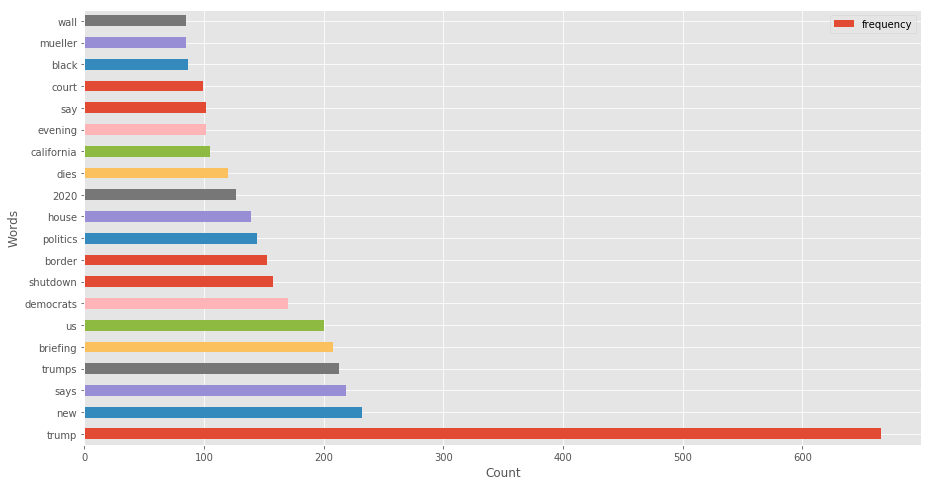

In [23]:
word_count_title.head(20).plot.barh(x = 'words', y = 'frequency', figsize = (15, 8))
plt.xlabel('Count')
plt.ylabel('Words')

In [24]:
word_count(nyt.ptag)

[('president', 860),
 ('trump', 588),
 ('said', 542),
 ('new', 358),
 ('mr', 351),
 ('would', 290),
 ('heres', 250),
 ('house', 239),
 ('know', 237),
 ('need', 235),
 ('one', 231),
 ('state', 216),
 ('democrats', 213),
 ('trumps', 209),
 ('states', 209),
 ('border', 206),
 ('former', 205),
 ('federal', 203),
 ('two', 191),
 ('government', 184),
 ('could', 173),
 ('day', 165),
 ('end', 163),
 ('people', 156),
 ('american', 155),
 ('years', 154),
 ('democratic', 148),
 ('first', 146),
 ('administration', 132),
 ('white', 129),
 ('week', 129),
 ('united', 129),
 ('many', 128),
 ('campaign', 126),
 ('say', 126),
 ('officials', 122),
 ('last', 121),
 ('women', 120),
 ('wall', 118),
 ('national', 117),
 ('shutdown', 113),
 ('congress', 107),
 ('senate', 107),
 ('time', 103),
 ('made', 103),
 ('presidents', 102),
 ('year', 102),
 ('ms', 100),
 ('may', 100),
 ('also', 100),
 ('court', 99),
 ('california', 98),
 ('special', 96),
 ('school', 96),
 ('public', 94),
 ('senator', 94),
 ('republican'

In [25]:
word_count_ptag = pd.DataFrame(word_count(nyt.ptag))

In [26]:
word_count_ptag.columns = ['words', 'frequency']

Text(0.5, 0, 'Count')

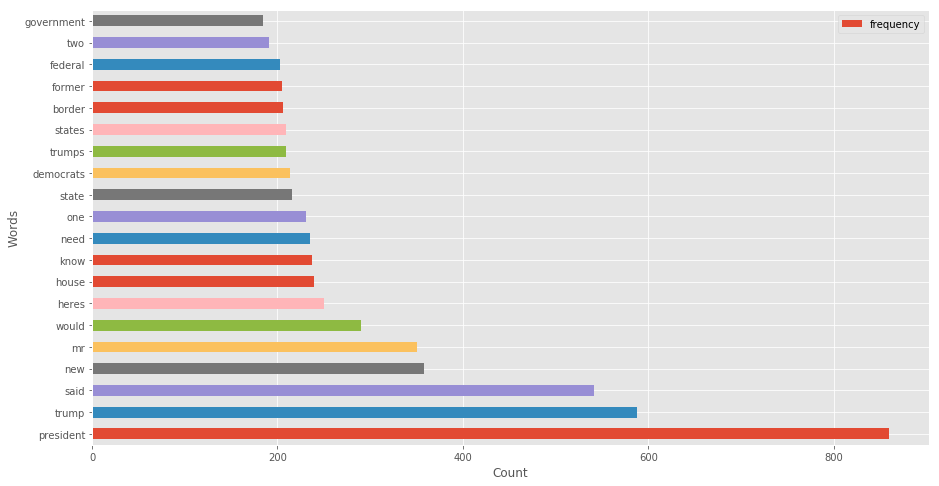

In [27]:
word_count_ptag.head(20).plot.barh(x = 'words', y = 'frequency', figsize = (15, 8))
plt.ylabel('Words')
plt.xlabel('Count')

In [28]:
word_freq_df = pd.merge(word_count_title,word_count_ptag, how = 'inner', on = 'words')
word_freq_df

,words,frequency_x,frequency_y
0,trump,666,588
1,new,232,358
2,says,219,70
3,trumps,213,209
4,briefing,208,2
5,us,200,80
6,democrats,170,213
7,shutdown,158,113
8,border,153,206
9,politics,144,76


In [29]:
word_freq_df['total_count'] = word_freq_df['frequency_x'] + word_freq_df['frequency_y']

In [34]:
word_freq_df.sort_values(by = 'total_count', ascending = False)

,words,frequency_x,frequency_y,total_count
0,trump,666,588,1254
25,president,69,860,929
1,new,232,358,590
252,said,20,542,562
3,trumps,213,209,422
6,democrats,170,213,383
10,house,139,239,378
8,border,153,206,359
5650,mr,1,351,352
191,would,25,290,315


Text(0.5, 0, 'Count')

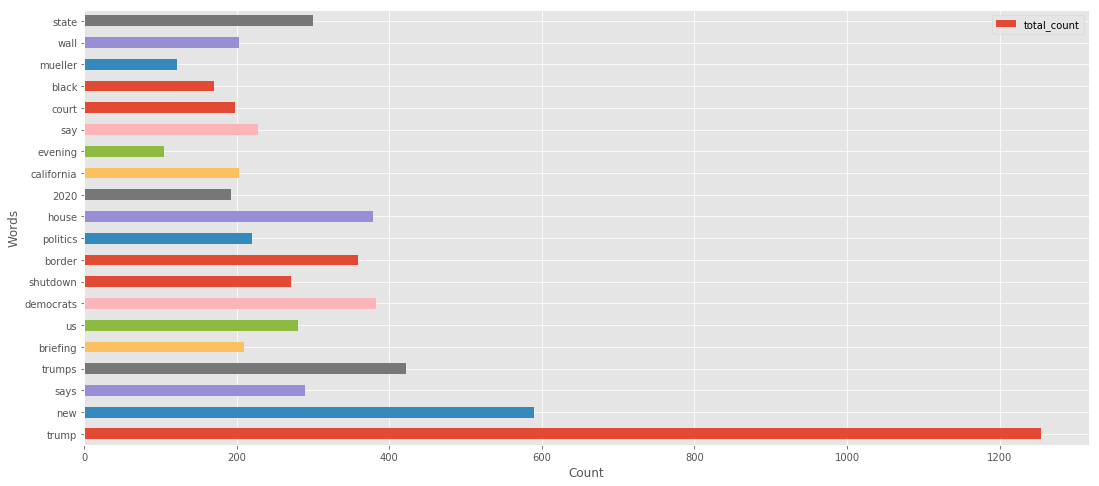

In [35]:
word_freq_df.head(20).plot.barh(x = 'words', y = 'total_count', figsize = (18, 8))
plt.ylabel('Words')
plt.xlabel('Count')

In [521]:
#using variable name to reuse the imported function without having to type ολοκληρο το σιδηροδρομο
#count_vec = CountVectorizer()
#counts how many times each word appears in a df. Example below
#count_title = count_vec.fit_transform(nyt.title)
#Same for ptags
#count_ptag = count_vec.fit_transform(nyt.ptag)
#Get the dictionary out of them with counts for each word
#title_dict = count_vec.vocabulary_
#ptag_dict = count_vec.vocabulary_
#Turn them into a dataframe for pandas manipulation --- easier way to create graphs
#TITLE
#countt_df = pd.DataFrame.from_dict(title_dict, orient='index')
#TITLE
#countt_df.sort_values(by = [0], ascending = False)
#countp_df = pd.DataFrame.from_dict(ptag_dict, orient = 'index')
#countp_df.sort_values(by = 0, ascending=False)
#Some error occurs. Returns the same content for ptag and title.

## Authors manipulation

In [522]:
#drop na values

dropna_authors = nyt.author.dropna(axis = 0, how = 'any')

In [523]:
#test print
dropna_authors

0                        ANNIE KARNI and MICHAEL D. SHEAR
1                                            ARTHUR LUBOW
2                        NIRAJ CHOKSHI and FRANCES ROBLES
3                                         JONATHAN MARTIN
4                                         MICHAEL PAULSON
5                    MICHAEL M. GRYNBAUM and SYDNEY EMBER
6                                         LAURA M. HOLSON
7                           REMY TUMIN and MARCUS PAYADUE
8                                           LISA FRIEDMAN
9                                          BENEDICT CAREY
10                                         BENEDICT CAREY
11      MARK MAZZETTI, MAGGIE HABERMAN, NICHOLAS FANDO...
13                   MICHAEL D. SHEAR and EILEEN SULLIVAN
14                                            ANNIE KARNI
15                                        PATRICIA MAZZEI
16                                          THOMAS FULLER
17                                           INYOUNG KANG
18            

In [524]:
# replace 'and' with list of strings
all_authors = dropna_authors.str.split(' and ', expand=True)

In [525]:
#rename columns
all_authors.columns = ['First Author', 'Second Author']

In [526]:
#test print
all_authors

,First Author,Second Author
0,ANNIE KARNI,MICHAEL D. SHEAR
1,ARTHUR LUBOW,None
2,NIRAJ CHOKSHI,FRANCES ROBLES
3,JONATHAN MARTIN,None
4,MICHAEL PAULSON,None
5,MICHAEL M. GRYNBAUM,SYDNEY EMBER
6,LAURA M. HOLSON,None
7,REMY TUMIN,MARCUS PAYADUE
8,LISA FRIEDMAN,None
9,BENEDICT CAREY,None


In [527]:
#drop dublicate names to process how many unique female and male names are on the list
authors_unique = all_authors.drop_duplicates(keep = 'first')

In [528]:
#rename columns of authors_unique DF
authors_unique.columns = ['First Author', 'Second Author']

In [529]:
#test print
authors_unique

,First Author,Second Author
0,ANNIE KARNI,MICHAEL D. SHEAR
1,ARTHUR LUBOW,None
2,NIRAJ CHOKSHI,FRANCES ROBLES
3,JONATHAN MARTIN,None
4,MICHAEL PAULSON,None
5,MICHAEL M. GRYNBAUM,SYDNEY EMBER
6,LAURA M. HOLSON,None
7,REMY TUMIN,MARCUS PAYADUE
8,LISA FRIEDMAN,None
9,BENEDICT CAREY,None


In [530]:
#test describe
nyt.author.describe()

count           4361
unique          1347
top       JILL COWAN
freq              89
Name: author, dtype: object

In [531]:
#male Vs. Female authors

# from gender import GenderDetector
# gd = GenderDetector()
# authors_by_gender = gd.gender(authors_unique['First Author'])
#Today is not working for some reason

In [532]:
#Find the top contributors. Seperated lists as some articles have 2 or moren authors
author1 = all_authors['First Author'].value_counts()

In [533]:
author2 = all_authors['Second Author'].value_counts()

In [534]:
#turned to dataframe for better manipulation and plot presentation
author1 = pd.DataFrame(author1)
author1.reset_index(inplace = True)
author1

,index,First Author
0,CHRIS STANFORD,110
1,JILL COWAN,90
2,ADAM LIPTAK,67
3,THE NEW YORK TIMES,65
4,SARAH MERVOSH,63
5,THE ASSOCIATED PRESS,60
6,MAGGIE HABERMAN,58
7,LISA LERER,57
8,JULIA JACOBS,57
9,MIHIR ZAVERI,57


In [535]:
#Same for both lists of authors
author2 = pd.DataFrame(author2)
author2.reset_index(inplace=True)
author2

,index,Second Author
0,MAGGIE HABERMAN,78
1,MARCUS PAYADUE,38
2,HIROKO MASUIKE,33
3,NICHOLAS FANDOS,25
4,KATIE BENNER,24
5,JONATHAN MARTIN,23
6,ALAN BLINDER,22
7,ANNA SCHAVERIEN,17
8,MONICA DAVEY,17
9,EMILY COCHRANE,15


In [536]:
#merged the two dataframes into one. Next step to merge them together
author_appear = pd.merge(author1, author2, how = 'inner', on='index')

In [537]:
author_appear

,index,First Author,Second Author
0,CHRIS STANFORD,110,6
1,JILL COWAN,90,9
2,ADAM LIPTAK,67,1
3,SARAH MERVOSH,63,5
4,MAGGIE HABERMAN,58,78
5,LISA LERER,57,4
6,JULIA JACOBS,57,6
7,MIHIR ZAVERI,57,7
8,NICHOLAS FANDOS,56,25
9,EMILY COCHRANE,56,15


In [538]:
#Merged and created a new column with the total article contributions of each author
author_appear['no. of articles'] = author_appear['First Author'] + author_appear['Second Author']
#assigned the new dataframe to a new name, so I can pass it on to the plot.
plot_author = author_appear.drop(['First Author', 'Second Author'], 1)

In [539]:
#test print, sorted from most to least
plot_author.sort_values(by='no. of articles', ascending = False)

,index,no. of articles
4,MAGGIE HABERMAN,136
0,CHRIS STANFORD,116
1,JILL COWAN,99
8,NICHOLAS FANDOS,81
9,EMILY COCHRANE,71
2,ADAM LIPTAK,68
3,SARAH MERVOSH,68
10,SHERYL GAY STOLBERG,65
7,MIHIR ZAVERI,64
6,JULIA JACOBS,63


Text(0.5, 0, 'Number of Articles Published')

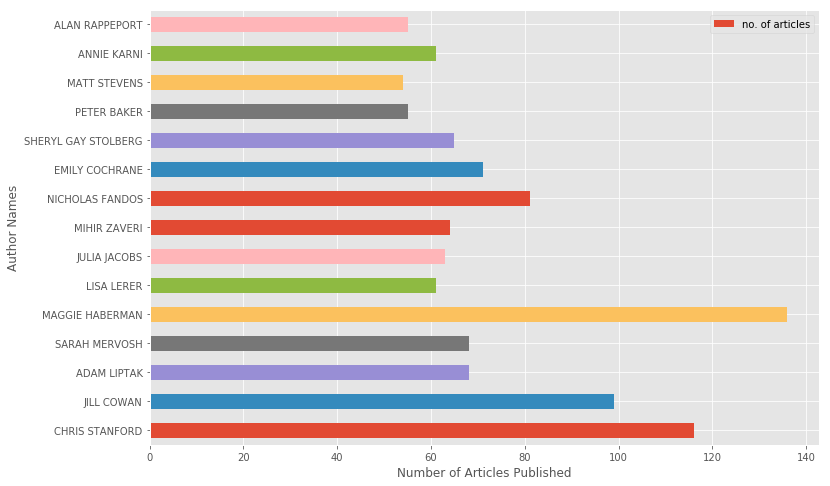

In [540]:
plot_author.head(15).plot.barh(x = 'index', y = 'no. of articles', figsize = (12,8))
plt.ylabel('Author Names')
plt.xlabel('Number of Articles Published')

## Spacy Tests
***save for future reference***

In [541]:
# nlp = spacy.load("en_core_web_sm")
# doc = nlp(nyt.title)
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [542]:
# nlp = spacy.load('en')
# for parsed_doc in nlp.pipe(iter(nyt['title']), batch_size=4, n_threads=6):
#     print(parsed_doc.text, parsed_doc[0].tag_)

In [543]:
# nlptext = spacy.load('en')
# for parsed_doc in nlp.pipe(iter(nyt['text']), batch_size=4, n_threads=6):
#     print(parsed_doc.text, parsed_doc[0].tag_)

In [544]:
# from spacy.lemmatizer import Lemmatizer
# lemmatizer = Lemmatizer()

In [545]:
#Most common words with spaCy

# nyt_df = nlp(open(nlptext).read())

In [546]:
#tried to open all df

# nyt_df= open('iCloud Drive⁩/Desktop⁩/NLP_News⁩').read()
# nlp=spacy.en.load()
# doc=nlp(nyt_df)

In [547]:
#parsing column title with spacy

# nlp=spacy.load('en')
# nyt['title'] = nyt['title'].apply(nlp)
# doc=nlp(nyt_df)

## Sentiment Analysis 
**overall for titles and their respective ptags**

In [40]:
# creating pd series to use them to concat a new DF with only the 2 columns thay have written data
#need to find a better way for that
title = nyt.title
ptag = nyt.ptag
author = nyt.author
date = nyt.date

In [41]:
nyt_tt = pd.concat([title, ptag], axis = 1)
nyt_tt

,title,ptag
0,hud moves limit public housing aid undocumente...,rule would require expanded use verification s...
1,barnes foundation show illuminates dawn photog...,exhibition shows pioneers photography saw domi...
2,trump administration announces new restriction...,whose property seized castro government hailed...
3,terry mcauliffe run president,former virginia governor concluded moderate pr...
4,san franciscos bighatted beach blanket babylon...,treasured san francisco staple renowned much s...
5,2020 democrats seek voters unusual spot fox news,network known conservative commentary staunch ...
6,listed rex fossil ebay 295 million scientists ...,thing alan detrich recalled telling museum dir...
7,mueller report columbine beyoncé wednesday eve...,heres need know end day
8,epa moves close door asbestos consumer groups ...,new rule restrict uses asbestos carcinogen ini...
9,dr richard green 82 dies challenged psychiatry...,time gay classified mental disorder dr green d...


In [42]:
#sentiment analysis using blotblob on titles and p. text

def sentiment_func(x):
    sentiment = TextBlob(x['title'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

In [43]:
#applying SA on the whole DF to see the final results

sa_nyt = nyt.apply(sentiment_func, axis=1)
sa_nyt

,title,ptag,author,date,polarity,subjectivity
0,hud moves limit public housing aid undocumente...,rule would require expanded use verification s...,ANNIE KARNI and MICHAEL D. SHEAR,17-Apr-19,0.000000,0.066667
1,barnes foundation show illuminates dawn photog...,exhibition shows pioneers photography saw domi...,ARTHUR LUBOW,17-Apr-19,0.000000,0.000000
2,trump administration announces new restriction...,whose property seized castro government hailed...,NIRAJ CHOKSHI and FRANCES ROBLES,17-Apr-19,0.136364,0.454545
3,terry mcauliffe run president,former virginia governor concluded moderate pr...,JONATHAN MARTIN,17-Apr-19,0.000000,0.000000
4,san franciscos bighatted beach blanket babylon...,treasured san francisco staple renowned much s...,MICHAEL PAULSON,17-Apr-19,0.000000,0.000000
5,2020 democrats seek voters unusual spot fox news,network known conservative commentary staunch ...,MICHAEL M. GRYNBAUM and SYDNEY EMBER,17-Apr-19,0.200000,1.000000
6,listed rex fossil ebay 295 million scientists ...,thing alan detrich recalled telling museum dir...,LAURA M. HOLSON,17-Apr-19,0.600000,0.700000
7,mueller report columbine beyoncé wednesday eve...,heres need know end day,REMY TUMIN and MARCUS PAYADUE,17-Apr-19,0.000000,0.000000
8,epa moves close door asbestos consumer groups ...,new rule restrict uses asbestos carcinogen ini...,LISA FRIEDMAN,17-Apr-19,0.000000,0.000000
9,dr richard green 82 dies challenged psychiatry...,time gay classified mental disorder dr green d...,BENEDICT CAREY,17-Apr-19,-0.200000,0.300000


In [44]:
sa_nyt = nyt.apply(sentiment_func, axis=1)

In [45]:
#overall mean for all articles US
sa_nyt['polarity'].mean()

0.009109950460061045

In [46]:
#overall mean for all articles US
sa_nyt['subjectivity'].mean()

0.19316972543189392

In [47]:
#Sentiment analysis over whole DF versus over DF wit just title and ptag content
sa_nytt = nyt.apply(sentiment_func, axis=1)

In [48]:
#polarity increase about +0.004
sa_nytt['polarity'].mean()

0.009109950460061045

In [49]:
#subjectivity increase about +0.014
sa_nytt['subjectivity'].mean()

0.19316972543189392

Text(0, 0.5, 'Number of Articles')

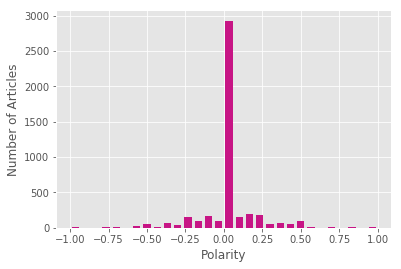

In [50]:
nytt_histT = plt.hist(sa_nyt['polarity'], bins = 30, color = 'mediumvioletred', rwidth=0.7)
plt.xlabel('Polarity')
plt.ylabel('Number of Articles')

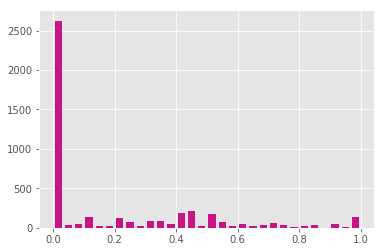

In [51]:
nytt_histP = plt.hist(sa_nyt['subjectivity'], bins = 30, color = 'mediumvioletred', rwidth=0.7)

## Analyzing Sentiment Analysis 
#### over specific events/words

**Mueller report**

In [53]:
#not running
#from datetime import datetime

#sa_nyt['date'] = sa_nyt.date.apply(lambda x: x.replace('April', 'Apr').replace('March', 'Mar'))
#sa_nyt
#sa_nyt['date'] = sa_nyt.date.apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
#mueller_dates = sa_nyt[(sa_nytt['date'] > "Jan 1, 2019") & (sa_nytt['date'] <= 'Mar 25, 2019')]
#mueller_report_title = mueller_dates[mueller_dates.title.str.contains('mueller')]
#mueller_report_text = mueller_dates[mueller_dates.ptag.str.contains('mueller')]
#mueller_report_title
# sa_mueller = mueller_report_text.apply(sentiment_func, axis=1)
# sa_mueller

In [54]:
mueller = sa_nyt[sa_nyt.title.str.contains('mueller')]
mueller

,title,ptag,author,date,polarity,subjectivity
7,mueller report columbine beyoncé wednesday eve...,heres need know end day,REMY TUMIN and MARCUS PAYADUE,17-Apr-19,0.000000,0.000000
11,white house justice dept officials discussed m...,president trumps advisers concerned whether re...,"MARK MAZZETTI, MAGGIE HABERMAN, NICHOLAS FANDO...",17-Apr-19,0.000000,0.000000
19,mueller report released thursday heres guide,highly anticipated report tell us lot russias ...,SHARON LAFRANIERE,17-Apr-19,0.000000,0.000000
32,waiting mueller trump passes time commenting news,speeches interviews twitter week president kin...,KATIE ROGERS and MAGGIE HABERMAN,16-Apr-19,0.000000,0.000000
63,notredame cathedral mueller report boston mara...,heres need know end day,ANDREA KANNAPELL and LISA IABONI,15-Apr-19,0.000000,0.000000
77,mueller report released thursday justice dept ...,attorney general promised would release stripp...,KATIE BENNER,15-Apr-19,0.000000,0.000000
96,emboldened attorney general trump confronts mu...,presidents plan attack act report extraneous a...,ANNIE KARNI and MAGGIE HABERMAN,14-Apr-19,0.050000,0.500000
206,exobama counsel expects charged soon muellerre...,gregory b craig would become first top democra...,KENNETH P. VOGEL,10-Apr-19,0.000000,0.000000
208,barr says congress may see redacted parts muel...,second straight day testimony release special ...,CHARLIE SAVAGE and KATIE BENNER,10-Apr-19,0.000000,0.000000
250,barr says hell release mueller report within w...,democrats accused attorney general withholding...,KATIE BENNER,9-Apr-19,0.000000,0.000000


In [58]:
mueller_sa = mueller.apply(sentiment_func, axis = 1)

In [59]:
mueller_sa.title.str.len().mean()

53.396039603960396

In [60]:
mueller_sa.mean()

polarity        0.031306
subjectivity    0.196058
dtype: float64

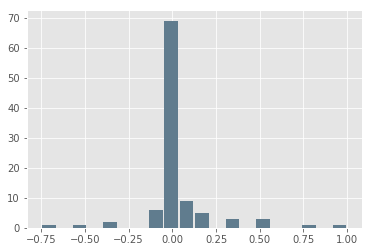

In [63]:
plt.hist(mueller_sa['polarity'], bins = 20, color = '#607c8e', rwidth=0.9)
plt.ylabel = 'Number or Articles'
plt.xlablel = 'Polarity'

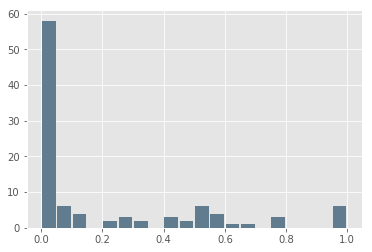

In [64]:
plt.hist(mueller_sa['subjectivity'], bins = 20, color = '#607c8e', rwidth=0.9)
plt.ylabel = 'Number or Articles'
plt.xlabel = 'Subjectivity'

**Trump**

In [66]:
trump = sa_nyt[sa_nyt.title.str.contains('trump', 'president')]

In [67]:
trump

,title,ptag,author,date,polarity,subjectivity
2,trump administration announces new restriction...,whose property seized castro government hailed...,NIRAJ CHOKSHI and FRANCES ROBLES,17-Apr-19,0.136364,0.454545
13,asylum seek explaining trumps new restrictions,attorney general william p barr issued order c...,MICHAEL D. SHEAR and EILEEN SULLIVAN,17-Apr-19,0.136364,0.454545
14,made america trumps ftc appointees may step,democrats federal trade commission want penali...,ANNIE KARNI,17-Apr-19,0.000000,0.000000
21,politics trumps united base america,presidents sought broaden public support presi...,NaN,17-Apr-19,-0.800000,1.000000
30,trump vetoes measure force end us involvement ...,president trumps decision reject bipartisan re...,MARK LANDLER and PETER BAKER,16-Apr-19,0.000000,0.000000
32,waiting mueller trump passes time commenting news,speeches interviews twitter week president kin...,KATIE ROGERS and MAGGIE HABERMAN,16-Apr-19,0.000000,0.000000
43,pressure cuba trump plans lift limits american...,move could open door thousands legal actions f...,PETER BAKER,16-Apr-19,0.000000,0.000000
56,gina haspel relies spy skills connect trump do...,ms haspel cia director proved adept tactician ...,JULIAN E. BARNES and ADAM GOLDMAN,16-Apr-19,0.000000,0.000000
58,politics trumps trade style could cost us,business groups wonder presidents unpredictabl...,NaN,16-Apr-19,0.000000,0.000000
62,ilhan omar fits trumps new culture war,politics newsletter mr trump taken old culture...,LISA LERER,15-Apr-19,0.136364,0.454545


In [68]:
trump_sa = trump.apply(sentiment_func, axis = 1)

In [69]:
trump_sa

,title,ptag,author,date,polarity,subjectivity
2,trump administration announces new restriction...,whose property seized castro government hailed...,NIRAJ CHOKSHI and FRANCES ROBLES,17-Apr-19,0.136364,0.454545
13,asylum seek explaining trumps new restrictions,attorney general william p barr issued order c...,MICHAEL D. SHEAR and EILEEN SULLIVAN,17-Apr-19,0.136364,0.454545
14,made america trumps ftc appointees may step,democrats federal trade commission want penali...,ANNIE KARNI,17-Apr-19,0.000000,0.000000
21,politics trumps united base america,presidents sought broaden public support presi...,NaN,17-Apr-19,-0.800000,1.000000
30,trump vetoes measure force end us involvement ...,president trumps decision reject bipartisan re...,MARK LANDLER and PETER BAKER,16-Apr-19,0.000000,0.000000
32,waiting mueller trump passes time commenting news,speeches interviews twitter week president kin...,KATIE ROGERS and MAGGIE HABERMAN,16-Apr-19,0.000000,0.000000
43,pressure cuba trump plans lift limits american...,move could open door thousands legal actions f...,PETER BAKER,16-Apr-19,0.000000,0.000000
56,gina haspel relies spy skills connect trump do...,ms haspel cia director proved adept tactician ...,JULIAN E. BARNES and ADAM GOLDMAN,16-Apr-19,0.000000,0.000000
58,politics trumps trade style could cost us,business groups wonder presidents unpredictabl...,NaN,16-Apr-19,0.000000,0.000000
62,ilhan omar fits trumps new culture war,politics newsletter mr trump taken old culture...,LISA LERER,15-Apr-19,0.136364,0.454545


In [70]:
#Average character length
trump_sa.title.str.len().mean()

53.802285714285716

In [71]:
trump_sa.mean()

polarity        0.012051
subjectivity    0.182491
dtype: float64

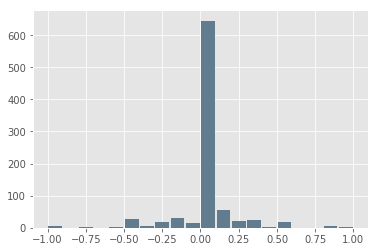

In [72]:
plt.hist(trump_sa['polarity'], bins = 20, color = '#607c8e', rwidth=0.9)
plt.ylabel = 'Number or Articles'
plt.xlablel = 'Polarity'

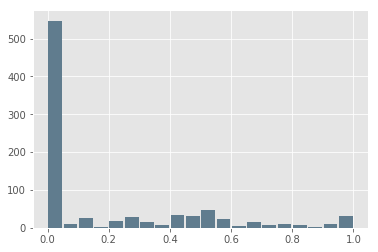

In [73]:
plt.hist(trump_sa['subjectivity'], bins = 20, color = '#607c8e', rwidth=0.9)
plt.ylabel = 'Number or Articles'
plt.xlabel = 'Subjectivity'

**Economy**

In [597]:
economy_title = sa_nyt[sa_nyt.title.str.contains('economy' or 'finance' or 'fiscal' or 'economical' or 'economics')]

In [598]:
economy_text = sa_nyt[sa_nyt.ptag.str.contains('economy' or 'finance' or 'fiscal' or 'economical' or 'economics')]
economy_text

,title,ptag,author,date,polarity,subjectivity
541,china purchases could undercut trumps larger t...,trade deal could result china promising buy hu...,ANA SWANSON and KEITH BRADSHER,1-Apr-19,0.000000,0.50
612,politics trumps economy,trade taxes federal reserve president trump ge...,NaN,28-Mar-19,0.000000,0.00
882,factchecking trumps misleading claims mccain t...,president trump speaking ohio exaggerated role...,LINDA QIU,20-Mar-19,0.000000,0.00
911,fed dimming economic outlook predicts rate inc...,federal reserve lowered growth forecast 21 per...,JIM TANKERSLEY,20-Mar-19,0.200000,0.20
921,another role construction cranes economic indi...,help clients assess hiring trends construction...,C. J. HUGHES,19-Mar-19,0.200000,0.20
925,trumps tax cut wont power growth predicts offi...,white house forecasters say economy would need...,JIM TANKERSLEY,19-Mar-19,0.000000,0.00
1802,republicans hope sway voters labels demonize d...,21 months election day 2020 republicans trying...,SHERYL GAY STOLBERG,17-Feb-19,0.000000,0.00
2154,pays fall escooter,wednesday welcome share economy liability gets...,JILL COWAN,6-Feb-19,0.000000,0.00
2355,case raising rates weakened says fed chairman,jerome h powell federal reserve chairman said ...,THE ASSOCIATED PRESS,30-Jan-19,0.000000,0.00
2454,2019 tax refund might higher lower later usual,unclear trump tax law affect refunds clockwork...,JIM TANKERSLEY and MATT PHILLIPS,27-Jan-19,0.000000,0.25


In [622]:
#Average title character length
economy_text.title.str.len().mean()

49.875

In [599]:
economy = economy_title.apply(sentiment_func, axis = 1)

In [600]:
economy.mean()

polarity        0.096154
subjectivity    0.205128
dtype: float64

(array([8., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2.]),
 array([0.        , 0.02166667, 0.04333333, 0.065     , 0.08666667,
        0.10833333, 0.13      , 0.15166667, 0.17333333, 0.195     ,
        0.21666667, 0.23833333, 0.26      , 0.28166667, 0.30333333,
        0.325     , 0.34666667, 0.36833333, 0.39      , 0.41166667,
        0.43333333]),
 <a list of 20 Patch objects>)

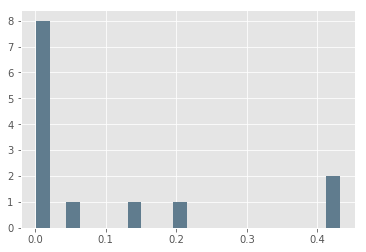

In [601]:
plt.hist(economy['polarity'], bins = 20, color = '#607c8e', rwidth=0.9)

(array([8., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 2.]),
 array([0.        , 0.03666667, 0.07333333, 0.11      , 0.14666667,
        0.18333333, 0.22      , 0.25666667, 0.29333333, 0.33      ,
        0.36666667, 0.40333333, 0.44      , 0.47666667, 0.51333333,
        0.55      , 0.58666667, 0.62333333, 0.66      , 0.69666667,
        0.73333333]),
 <a list of 20 Patch objects>)

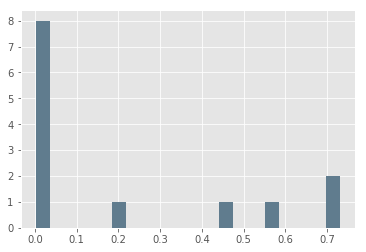

In [602]:
plt.hist(economy['subjectivity'], bins = 20, color = '#607c8e', rwidth=0.9)

**Republicans**

In [603]:
republicans = sa_nyt[sa_nyt.title.str.contains('republicans' or 'republican'or 'tea party')]
republicans

,title,ptag,author,date,polarity,subjectivity
145,polls private meetings republicans craft blunt...,republicans polltesting ways portray democrats...,JEREMY W. PETERS,12-Apr-19,-0.062500,0.687500
416,like stepping rake wave scandals hits north ca...,seven years ago party set transform historical...,ALAN BLINDER and RICHARD FAUSSET,4-Apr-19,0.000000,0.000000
431,senate republicans go nuclear speed trump conf...,third time since 2013 senate majority changed ...,GLENN THRUSH,3-Apr-19,0.000000,0.000000
441,senate republicans go nuclear speed trump conf...,third time since 2013 senate majority changed ...,GLENN THRUSH,3-Apr-19,0.000000,0.000000
453,senate republicans go nuclear speed trump conf...,third time since 2013 senate majority changed ...,GLENN THRUSH,3-Apr-19,0.000000,0.000000
729,support lgbt rights drops among young republic...,study 40000 americans also found asianpacific ...,HEATHER MURPHY,26-Mar-19,0.100000,0.400000
730,support lgbt rights drops among young republic...,study 40000 americans also found asianpacific ...,HEATHER MURPHY,26-Mar-19,0.100000,0.400000
747,trump republicans seek turn tables postmueller...,president trump allies went offensive vowing p...,PETER BAKER and NICHOLAS FANDOS,25-Mar-19,0.000000,0.000000
784,eager court jews fracture democrats republican...,bills part larger political strategy aimed par...,GLENN THRUSH,24-Mar-19,0.000000,0.000000
859,wisconsin judge blocks republicans move limit ...,one several lawsuits efforts weaken power gov ...,MONICA DAVEY,21-Mar-19,0.000000,0.000000


In [623]:
#Average title length
republicans.title.str.len().mean()

60.666666666666664

In [604]:
republicans.mean()

polarity       -0.044540
subjectivity    0.162343
dtype: float64

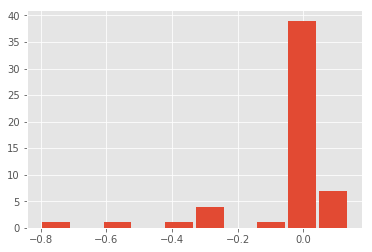

In [611]:
tea_hist = plt.hist(republicans['polarity'], bins = 10, rwidth=0.9)
plt.xlabel = 'Polarity'

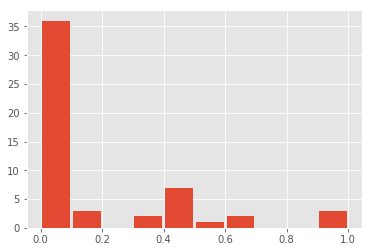

In [613]:
tea_sub = plt.hist(republicans['subjectivity'], bins = 10, rwidth=0.9)

**Democrats**

In [614]:
democrats = sa_nyt[sa_nyt.title.str.contains('democrat' or 'democrats'or 'dems'or 'democratics'or'democratic party')]

In [615]:
democrats.mean()

polarity        0.065578
subjectivity    0.193055
dtype: float64

In [624]:
#Average title length
democrats.title.str.len().mean()

57.31896551724138

(array([  4.,   4.,   2., 161.,  23.,  14.,  20.,   1.,   2.,   1.]),
 array([-0.6 , -0.44, -0.28, -0.12,  0.04,  0.2 ,  0.36,  0.52,  0.68,
         0.84,  1.  ]),
 <a list of 10 Patch objects>)

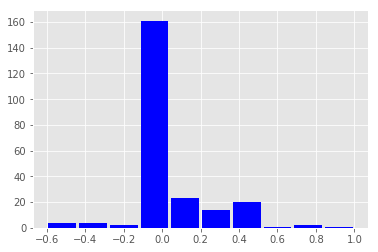

In [618]:
plt.hist(democrats['polarity'], bins = 10, rwidth=0.9, color = 'blue')

(array([142.,   6.,  12.,   9.,  18.,  27.,   4.,   1.,   3.,  10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

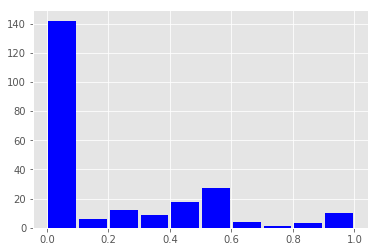

In [619]:
plt.hist(democrats['subjectivity'],bins = 10, rwidth=0.9, color='blue')

## Word Cloud

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [76]:
wc = WordCloud(background_color="white", max_words=1000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(word_freq_df['words']))

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

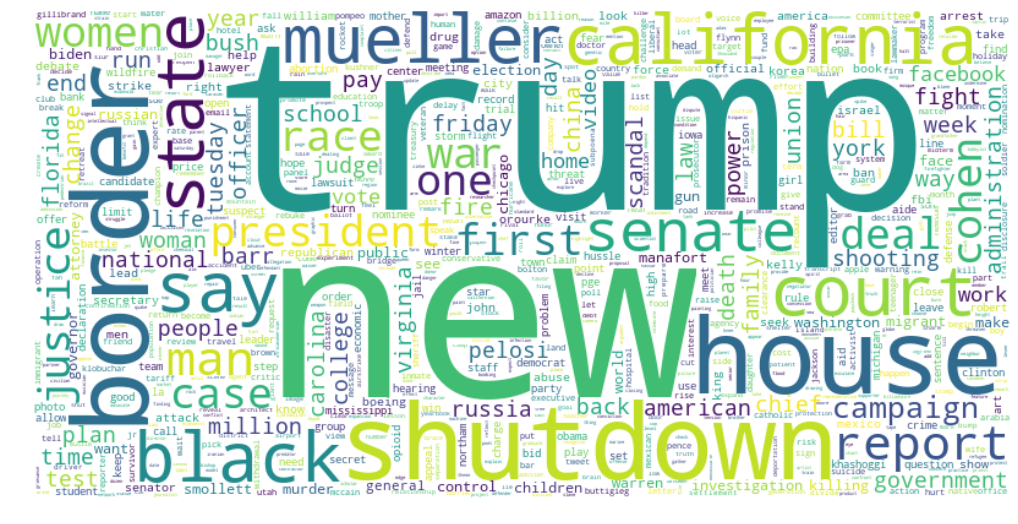

In [79]:
plt.figure(figsize=(18, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()